The dataset used in this project is from this Kaggle challenge: https://www.kaggle.com/c/DontGetKicked

The purpose of this challenge is to predict if the purchased car is a "bad buy" (Kick).



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#import data from csv
#data in pandas is in dataframe format
dataurl = 'https://raw.githubusercontent.com/dtyy9/dataplayground/main/training.csv'
data = pd.read_csv(dataurl)
data.head()
len(data)

72983

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [7]:
#drop records with NAs
data2 = data.dropna(axis = 0, how = 'any', subset = ['Color','Transmission','Nationality','Size','TopThreeAmericanName','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice',     
'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice'])
len(data2.index)

72658

Text(0, 0.5, 'Frequency')

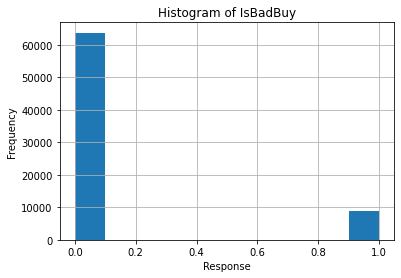

In [8]:
#data visualization to check the variances of the features with categorical values
#so categories with small counts can be grouped together
%matplotlib inline
#check the response distribution, in this case histogram of isBadBuy
data2.IsBadBuy.hist()
plt.title('Histogram of IsBadBuy')
plt.xlabel('Response')
plt.ylabel('Frequency')

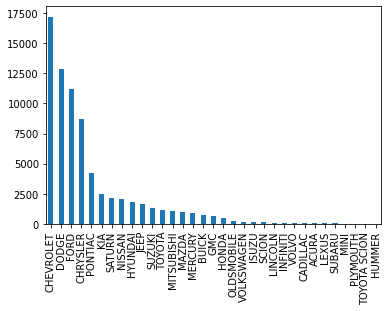

In [9]:
data2.Make.value_counts().plot(kind='bar')

In [10]:
def recategorize(data,columnname):
  #retain a category only when it takes more than 1% of the total record
  counts = data[columnname].value_counts()
  nameSet = set(counts[counts>=0.01*len(data.index)].index.values)
  #at least 1% of all the data
  data.loc[:,columnname] = data[columnname].apply(lambda x:'OTHER' if x not in nameSet else x)
  return data

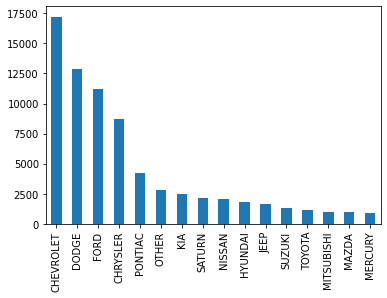

In [12]:
data2 = recategorize(data2, 'Make')
data2.Make.value_counts().plot(kind='bar') #after regrouping categories

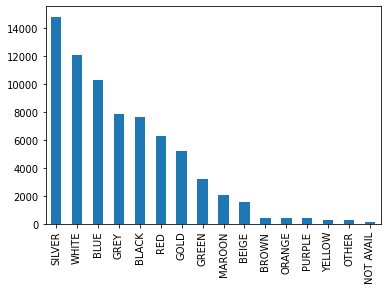

In [13]:
data2.Color.value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


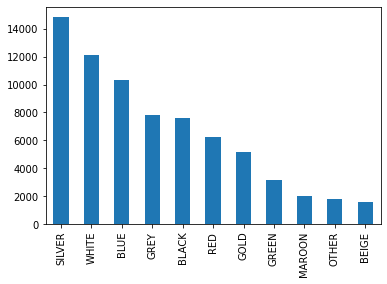

In [14]:
data2 = recategorize(data2, 'Color')
data2.Color.value_counts().plot(kind='bar')

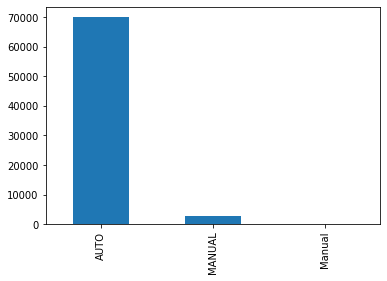

In [20]:
data2.Transmission.value_counts().plot(kind='bar')

In [28]:
#clean dup categories mean the same thing
data2['Transmission'].apply(lambda x:'MANUAL' if x == 'Manual' else x) 
data2['Transmission'].value_counts()

AUTO      70087
MANUAL     2571
Name: Transmission, dtype: int64

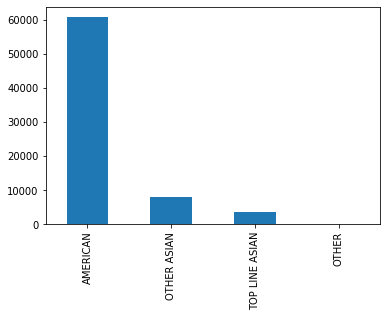

In [29]:
data2.Nationality.value_counts().plot(kind='bar')

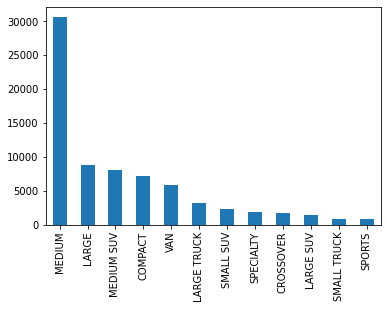

In [30]:
data2.Size.value_counts().plot(kind='bar')

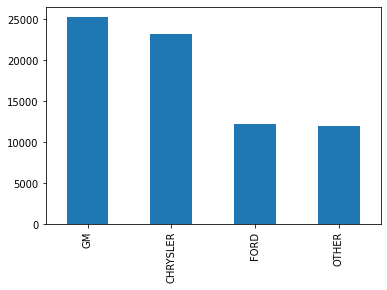

In [31]:
data2.TopThreeAmericanName.value_counts().plot(kind='bar')

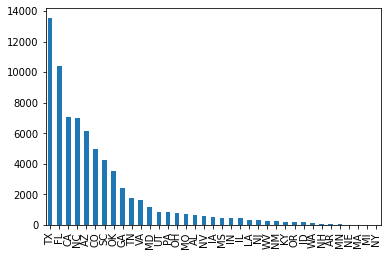

In [32]:
data2.VNST.value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


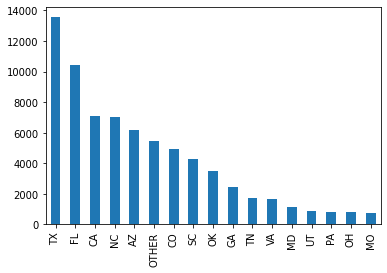

In [33]:
data2 = recategorize(data2, 'VNST')
data2.VNST.value_counts().plot(kind='bar')

In [34]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72658 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72658 non-null  int64  
 1   IsBadBuy                           72658 non-null  int64  
 2   PurchDate                          72658 non-null  object 
 3   Auction                            72658 non-null  object 
 4   VehYear                            72658 non-null  int64  
 5   VehicleAge                         72658 non-null  int64  
 6   Make                               72658 non-null  object 
 7   Model                              72658 non-null  object 
 8   Trim                               70301 non-null  object 
 9   SubModel                           72658 non-null  object 
 10  Color                              72658 non-null  object 
 11  Transmission                       72658 non-null  obj

In [35]:
#drop irrelevant or redundant features
data2_cleaned = data2.drop(['RefId','PurchDate','VehYear','WheelTypeID','BYRNO','VNZIP1','PRIMEUNIT','AUCGUART'],axis=1)
data2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72658 entries, 0 to 72982
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           72658 non-null  int64  
 1   Auction                            72658 non-null  object 
 2   VehicleAge                         72658 non-null  int64  
 3   Make                               72658 non-null  object 
 4   Model                              72658 non-null  object 
 5   Trim                               70301 non-null  object 
 6   SubModel                           72658 non-null  object 
 7   Color                              72658 non-null  object 
 8   Transmission                       72658 non-null  object 
 9   WheelType                          69494 non-null  object 
 10  VehOdo                             72658 non-null  int64  
 11  Nationality                        72658 non-null  obj

In [36]:
#generate dummy variables for categorical data
dataFinal = pd.get_dummies(data2_cleaned)
len(list(dataFinal))

2140

In [37]:
dataFinal.head()

,IsBadBuy,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,...,VNST_NC,VNST_OH,VNST_OK,VNST_OTHER,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA
0,0,3,89046,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,...,0,0,0,0,0,0,0,0,0,0
1,0,5,93593,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,...,0,0,0,0,0,0,0,0,0,0
2,0,4,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,...,0,0,0,0,0,0,0,0,0,0
3,0,5,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#create feature and label datasets separately
Y = dataFinal.loc[:,'IsBadBuy']
X = dataFinal.drop('IsBadBuy',axis=1)

In [42]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: IsBadBuy, dtype: int64

In [43]:
X.head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,...,VNST_NC,VNST_OH,VNST_OK,VNST_OTHER,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA
0,3,89046,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,...,0,0,0,0,0,0,0,0,0,0
1,5,93593,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,...,0,0,0,0,0,0,0,0,0,0
2,4,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,...,0,0,0,0,0,0,0,0,0,0
3,5,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,...,0,0,0,0,0,0,0,0,0,0
4,4,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.preprocessing import StandardScaler as SC
sc = SC()
Xnew = sc.fit_transform(X)

In [46]:
Xnew[:5]

array([[-0.6899679 ,  1.20269835,  0.82282644, ..., -0.47870472,
        -0.11040614, -0.15253078],
       [ 0.47933884,  1.51482274,  0.29448878, ..., -0.47870472,
        -0.11040614, -0.15253078],
       [-0.10531453,  0.15663199, -1.18859282, ..., -0.47870472,
        -0.11040614, -0.15253078],
       [ 0.47933884, -0.4055626 , -1.72017929, ..., -0.47870472,
        -0.11040614, -0.15253078],
       [-0.10531453, -0.14814749, -0.89985486, ..., -0.47870472,
        -0.11040614, -0.15253078]])

In [72]:
import sklearn
from sklearn.model_selection import train_test_split
Xnew_train, Xnew_test, Y_train, Y_test = train_test_split(Xnew,Y)

In [77]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(max_iter=400)
lr.fit(Xnew_train, Y_train)

LogisticRegression(max_iter=400)

In [79]:
lr.score(Xnew_test, Y_test)

0.8912744288466832

In [80]:
lr1 = LR(C=0.7, max_iter=400)
lr1.fit(Xnew_train, Y_train)

LogisticRegression(C=0.7, max_iter=400)

In [81]:
lr1.score(Xnew_test, Y_test)

0.8913294797687862

In [82]:
lr2 = LR(C=0.3, max_iter=400)
lr2.fit(Xnew_train, Y_train)

LogisticRegression(C=0.3, max_iter=400)

In [83]:
lr2.score(Xnew_test, Y_test)

0.8915496834571979